# Computação científica e análise de dados - 2023.2
# **Lista 3**: Interpolação, regressão e sistemas dinâmicos
## **Autor:** Artur Henrique Teixeira do Amaral
## **DRE:** 122032113

### Exercício 01

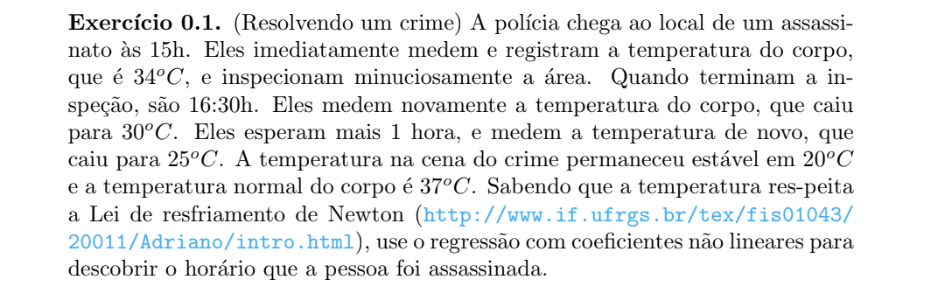

O modelo usado será a equação da lei de resfriamento de Newton, descrita abaixo:

\begin{equation}
T(t) = (T_0-T_f)e^{-kt} + T_f
\end{equation}

Onde $T(t)$ é a temperatura de um corpo no instante de tempo $t$, $T_0$ e $T_f$ são as temperaturas inicial e final do corpo e $k$ é a taxa de resfriamento.

Para utilizar as técnicas de regressão polinomial que vimos em aula, vamos linearizar o modelo e encontrar os parâmetros para um polinômio de primeiro grau equivalente à nossa equação. 

Para tal, vamos aplicar o log natural dos dois lados e desenvolver:

\begin{equation}
ln(T(t) - T_f) = ln( (T_0-T_f) e^{-kt})
\end{equation}

\begin{equation}
ln(T(t) - T_f) = ln(T_0-T_f) + ln(e^{-kt})
\end{equation}

\begin{equation}
ln(T(t) - T_f) = ln(T_0-T_f) - kt
\end{equation}

Esta última equação caracteriza um polinômio de segundo grau, pois podemos traçar a seguinte equivalência:

\begin{equation}
T'(t) = at + b
\end{equation}

Consideraremos a temperatura final do corpo como *zero* e a temperatura inicial como $34°C$. Logo:

- $T'(t) = ln(T(t))$
- $b = ln(34) \approx 3,526360525$
- $a = -k$

Abaixo, segue uma tabela para destacar os dados do problema. Note que o instante da primeira medição foi tomado como referência de tempo, sendo definido como instante inicial. Todas as outras medidas de tempo são a quantidade de minutos transcorridos após essa medição. Como o crime foi anterior a esse evento, esperamos encontrar um número negativo como resultado.

\begin{array}{|c|c|}
\hline
\text{tempo [minutos]} & \text{T(t) [°C]} & \text{$T^{'}(t)$ [°C]} \\
\hline
\text{0} & \text{34} & \text{ln(34)} \\
\text{90} & \text{30} & \text{ln(30)} \\
\text{150} & \text{25} & \text{ln(25)} \\
\hline
\end{array}

Então, vamos encontrar o coeficiente $a$ para nosso modelo linear.

In [21]:
using LinearAlgebra

function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

T_0 = 34
T_f = 0

b = log(T_0)

x = [0; 90; 150]
y = [log(34); log(30); log(25)]

#reta
V=vandermonde(x,y,1)
b=regressão(x,y,1)

println("Parâmetros ajustados:")
print("b: ")
println(b[1])
print("a: ")
println(b[2])

Parâmetros ajustados:
b: 3.5419730711674173
a: -0.0019978561764822295


Como no caso do nosso modelo o tempo é a variável indepentende, substituimos os valores desejados e isolamkos a variável do tempo para obter seu valor

\begin{equation}
T'(t) = at + b
\end{equation}

\begin{equation}
ln(T(t)) = at + b
\end{equation}

\begin{equation}
ln(T(t)) \approx -0.002t + 3.542
\end{equation}

Como a temperatura no instante que desejamos é $37°C$, temos:

\begin{equation}
ln(37) \approx -0.002t + 3.542
\end{equation}

\begin{equation}
t \approx \frac{ln(37) - 3.542}{-0.002}
\end{equation}

\begin{equation}
t \approx -34,5
\end{equation}


Logo, analisando o modelo ajustado aos nossos dados, o homicídio ocorrou 35 minutos antes da primeira medição, ou seja, aproximadamente às 14h25.

### Exercício 02

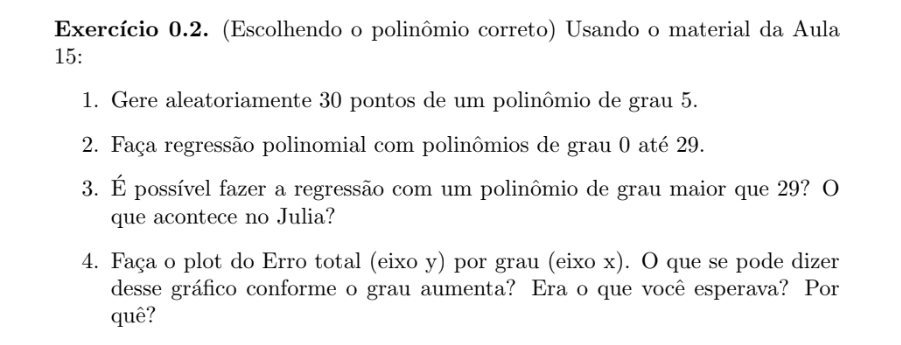

#### Item 1

Gerando abitrariamente 30 pontos $(x,y)$ que representam um um para $(x,f(x))$, onde $f(x)$ é um polinômio de grau 5. Esses pontos estão armazenados no vetor $data_{30,2}$, que são nossos dados a serem ajustados.

In [214]:
using Random, Printf, LinearAlgebra

# Função que define polinômio de grau 5. Coeficientes arbitrários.
function fifth_degree_polynomial(x)
    y = 1*x^5 + 5*x^4 + 1*x^3 + 1*x^2 + x^1 + 1 
    return y 
end

n = 30
data = zeros(n,2)

for i in 1:30
    random_x = -10 + 20 * rand()
    random_y = fifth_degree_polynomial(random_x)
    data[i,1] = random_x
    data[i,2] = random_y
end

println("Dados (x,y) gerados por inputs aleatórios em um polinômio de quinto grau")
display(data)

Dados (x,y) gerados por inputs aleatórios em um polinômio de quinto grau


30×2 Matrix{Float64}:
  7.93859    51960.1
 -8.27533   -15865.6
  0.930505       8.04798
  7.92965    51691.8
  4.96387     6202.26
  2.08343      149.931
 -1.77442       28.7638
  6.32227    18389.4
  0.407493       1.79031
  3.22936      943.353
 -8.74248   -22462.0
 -8.27494   -15860.9
 -7.78273   -10626.9
  ⋮         
 -6.39792    -2568.62
  1.27403       22.4949
 -3.33307      177.477
  8.10042    57011.0
  0.936519       8.20164
  6.15555    16294.5
 -9.31941   -33312.9
  1.93752      111.731
  9.15027        1.00057e5
 -9.51419   -37767.7
 -0.983534       3.79079
 -3.78296      206.639

#### Itens 2 e 3

In [164]:
# Retorna matriz de Vandermonde.
function vandermonde(data, degree)

    x=data[:,1]
    y=data[:,2]
    
    n, = size(y)

    V = zeros(n, degree+1)
    
    for i=1:n
        for j=1:(degree+1)
            
            V[i,j]=x[i]^(j-1)
            
        end
    end
    return V
end

function regression(data, degree)
    
    y = data[:,2]
    V = vandermonde(data, degree)
    
    # mínimos quadrados
    c=V\y
    
    return c
end

# Sanity check: Ajustando um polinômio de grau zero e vendo se é compatível com a média dos valores de y.
# a é o vetor com coeficientes do polinômio ajustado ao nosos dado. 
a = regression(data, 0)

using Statistics
y=data[:,2];
mean_value = mean(y)

display(a)
display(mean_value)

# Agora sim, o itens 2 e 3: Gerar a regressão polinomial para os graus 0 até 50.

println("Efetuando regressão polinomial desde o grau 0 até 50")

# n: nº de graus de polinômios que tentaremos.
n = 50

for i in 0:n
    a = regression(data, i)
    display(norm(a))
end


1-element Vector{Float64}:
 21232.77818369858

21232.77818369859

Efetuando regressão polinomial desde o grau 0 até 50


21232.77818369858

19558.069617497444

8060.09028741466

4946.045933087088

2055.2731406158523

5.477225575052734

5.477225575051615

5.477225575051786

5.477225575051399

5.477225575051504

5.477225575052516

5.477225575052239

5.4772255750506496

5.477225575052314

5.47722557505165

5.377887324868426

1.225238357615469

0.9593024421997477

0.05145451514030519

0.007557609334502449

0.00228860818469316

0.00011769797559937633

2.3262355031128738e-5

4.495496079934933e-6

8.438495806920311e-7

1.449138867129815e-7

1.7127179040126062e-10

6.328837820732655e-11

3.051802325293449e-12

5.477225574854312

9.855377252626602e-14

5.28949140317095e-14

3.1156805035207095e-16

2.970165945990474e-17

5.763568816726957e-18

4.698887811063212e-19

1.0692263320762749e-19

7.151739290395098e-21

2.1074503302798477e-21

1.2739096966810213e-22

4.9083189517725767e-23

3.8527921666727376e-24

1.3976841371797576e-24

1.5612392155119812e-25

4.130445107446518e-26

1.1129486334844123e-28

1.2859941521621547e-29

1.5297145310031268e-30

1.7782616386633274e-31

2.135795599729016e-32

2.4963211945918556e-33

Observando o comportamento da regressão para polinômios de grau 1 até 50, observamos que, anomalamente, a norma do vetor de coeficientes justamente no grau 29 é muito mais alta, e depois desce lentamente até estabilizar-se em zero. Não sei explicar este fenômeno.

O mesmo comportamente anômalo é observado se mudarmos os coeficientes do polinômio que gera os pontos. O grau 29 é um ponto onde o resultado dá um número muito destoante dos demais e que, a partir dali, a norma do vetor de coeficientes tende a cair para zero.

#### Item 4

Seja $ŷ$ o valor retornado pelo nosso polinômio ajustado para um determinado $x$ dos nossos dados, calcularemos o erro para cada ajuste (grau de polinômio) como:

\begin{equation}
\sum_{i=1}^n ||ŷ-y||
\end{equation}

Sendo $ŷ$ obtido da forma:

\begin{equation}
ŷ = F(x)
\end{equation}

onde $F$ é o polinômio que geramos através da regressão, independente do grau.

Como a função acima é de importância para resolução da questão, segue abaixo sua implementação.

In [209]:
# Recebe x real e grau do polinômio. Retorna vetor linha o formato de vandermonde
function vandermonde_modified(x, degree)
    
    v = zeros(degree + 1)
    n = size(v)[1]
    display(v)
    
    for i = 1:n
        display(v[:,i])
    end
    return v
end



# Recebe um x real e um vetor com os coeficientes ajustados.
function F(x, a)
    degree = size(a)[1]

    return v
end

v = vandermonde_modified(1, 4)
display(v)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

LoadError: BoundsError: attempt to access 5-element Vector{Float64} at index [1:5, 2]

### Exercício 04

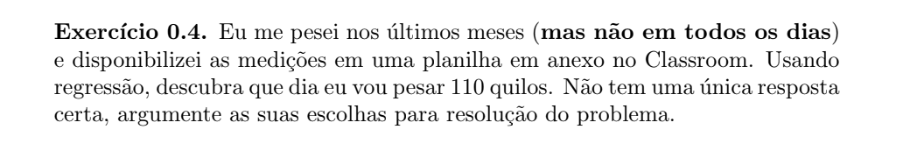

#### Pré-processamento dos dados

Os dados disponibilizados pelo professor possuem uma relação entre data do ano e peso em quilogramas. Para adequar melhor ao nosso ferramental matemático, transformei as datas em números inteiros, que representam a quantidade de dias passados desde o primeiro dia de medição, que foi 26/10. Essa etapa foi feita em Python por conta familiaridade minha com a linguagem. O arquivo tratado aqui já foi pré-processado anteriormente.

In [1]:
# Instalando pacotes necessários
import Pkg;
Pkg.add("DataFrames");
Pkg.add("CSV");

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
using CSV, DataFrames, LinearAlgebra

csv_file_path = "processed-pesagem.csv"

# Lê CSV em um dataframe.
df = CSV.File(csv_file_path, delim=',') |> DataFrame

# Extrai colunas do dataframe.
days = df[:, 1]
weights = df[:, 2]

# Converte DataFrame em arrays convencionais
days = collect(days);
weights = collect(weights);

size(days)

(68,)

Nesse ponto, o vetor *weights* possui as medições de peso do João, e *days* possui os dias decorridos a partir de 26 de outubro, que virou o elemento zero da lista.

Utilizarei um modelo linear como base da regressão, pois, dada uma observação inicial dos dados, não parece existr motivo para utilização de um modelo mais sofisticado.

Logo, sejam $w$ a variável independente que representa as medidas de peso e $d$ a variável que representa os dias após a medida inicial, temos o seguinte modelo:

\begin{equation}
d(w) = a_0 + a_1w
\end{equation}

Como temos 68 medições, temos uma matriz de Vandermonde $V_{68x2}$ representando os pesos no polinômio e uma matriz $b_{68x1}$ contendo os dias.

Iremos encontrar o vetor $a$ contendo nosso parâmetros de ajuste ao resolver a **equação normal do sistema linear obtido do modelo:

\begin{equation}
Va = b
\end{equation}

\begin{equation}
V^{t}Va = V^{t}b
\end{equation}

In [3]:
# Função fornecida pelo professor. Monta a matriz de Vandermonde conforme nossos dados.
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

# Função que implementa polinômio do primeiro grau.
function f(a, x)
    y = a[1] + a[2]*x
    return y
end

f (generic function with 1 method)

In [4]:
# Obtendo matrizes da equação normal.
b = days
V = vandermonde(weights, days, 1)

VtV = transpose(V) * V;
Vtb = transpose(V) * b;

# Resolvendo equação normal para a. Isso nos dá os coeficientes do polinômio.
a = VtV\Vtb

2-element Vector{Float64}:
 1576.9484267317455
  -12.93456085571097

In [6]:
result = f(a,110)
print("O peso 110 kg será atingido ")
print(trunc(Int,result))
println(" dias após a medição inicial.")

O peso 110 kg será atingido 154 dias após a medição inicial.


O resultado acima nos indica que, a partir de uma análise da tendência, o João pesará 110kg 154 dias após a primeira medida, que foi 26 de outubro. Ou seja, ele pesará 110kg por volta do dia 29 de março do ano seguinte.